In [1]:
from PIL import Image
import numpy as np
from osgeo import gdal
import imageio.v2 as imageio

import matplotlib.pyplot as plt

## Convert DHM (TIF to PNG)

In [52]:

def tif_to_png(input_tif, output_png):
    try:
        # Open the input tif file
        dataset = gdal.Open(input_tif)
        if dataset is None:
            print("Failed to open the file.")
            return

        # Read the data
        data = dataset.ReadAsArray()

        if data is None:
            print("Failed to read data from the file.")
            return

        # Normalize data to 16-bit range (0-65535)
        min_val = np.min(data)
        max_val = np.max(data)
        
        if min_val == max_val:
            print("Data has no variation. Cannot normalize.")
            return
        
        
        
        normalized_data = (data - min_val) / (max_val - min_val) * 65535
        normalized_data = normalized_data.astype(np.uint32)

        # Save as 16-bit PNG
        imageio.imwrite(output_png, normalized_data)
        print(f"Conversion completed. Saved as {output_png}")
       

        # Plot the data without axis and color bar
        plt.figure(figsize=(data.shape[1] / 100, data.shape[0] / 100), dpi=100)
        plt.axis('off')
        plt.imshow(data, cmap='gray')
        #plt.savefig(output_png.replace('.png', '_plot.png'), bbox_inches='tight', pad_inches=0)
        

    except Exception as e:
        print(f"An error occurred: {e}")

    finally:
        # Close the dataset
        dataset = None


In [80]:
#Task 1 Entlebuch
file_path_entlebuch = "dhm25_entlebuch.tif"

#Task 1 Zweisimmen
file_path_zweisimmen = "dhm25_zweisimmen.tif"
#Task 2 Beromünster
file_path_beromuenster = "dhm25_beromuenster.tif"
#Task 2 Wil SG
file_path_wil = "dhm25_wil.tif"
#Task 3 Grenchen
file_path_grenchen = "dhm25_grenchen.tif"
#Task 3 Buochs
file_path_buochs = "dhm25_dhm25.tif"
#---------------------------------------


#Out paths
file_out_entlebuch = "dhm25_entlebuch1.png"
file_out_zweisimmen = "dhm25_zweisimmen.png"
file_out_beromuenster = "dhm25_beromuenster.png"
file_out_wil = "dhm25_wil.png"
file_out_grenchen = "dhm25_grenchen.png"

Conversion completed. Saved as dhm25_grenchen.png
Verification failed: dhm25_grenchen.png is not a 16-bit image. Detected mode: I


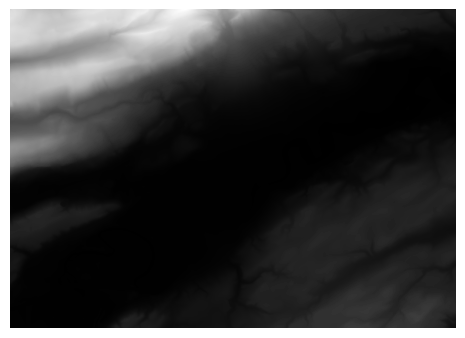

In [81]:

#tif_to_png(file_path_entlebuch, file_out_entlebuch)
tif_to_png(file_path_grenchen, file_out_grenchen)

## Convert SwissImage (TIF to PNG)

In [46]:
from PIL import Image

def tif_to_png_swissimage(input_tif, output_png):
    # Open the input tif file
    dataset = gdal.Open(input_tif)

    if dataset is None:
        print("Failed to open the file.")
        return

    # Read the data
    red_band = dataset.GetRasterBand(1).ReadAsArray()
    green_band = dataset.GetRasterBand(2).ReadAsArray()
    blue_band = dataset.GetRasterBand(3).ReadAsArray()

    # Stack bands together
    rgb_data = np.dstack((red_band, green_band, blue_band))

    # Convert to PIL Image
    image = Image.fromarray(rgb_data)

    # Convert to 16-bit
    #image = image.convert('I;16')

    # Save as 16-bit PNG
    image.save(output_png)
    

    # Close the dataset
    dataset = None
    

    print(f"Conversion completed. Saved as {output_png}")



In [78]:

input_tif_entlebuch = 'swissimage25m_entlebuch.tif'  
output_png_entlebuch = 'Swissimage_entlebuch.png'  


input_tif_zweisimmen = 'swissimage25m_zweisimmen.tif'  
output_png_zweisimmen= 'Swissimage_zweisimmen.png'  

input_tif_beromuenster = 'swissimage25m_beromuenster.tif'  
output_png_beromuenster = 'Swissimage_beromuenster.png'


input_tif_wil = 'swissimage25m_wil.tif'  
output_png_wil = 'Swissimage_wil.png'


input_tif_grenchen = 'swissimage25m_grenchen.tif'  
output_png_grenchen = 'Swissimage_grenchen.png'

tif_to_png_swissimage(input_tif_grenchen, output_png_grenchen)

Conversion completed. Saved as Swissimage_grenchen.png


## Check Heights 

In [79]:
from osgeo import gdal

def read_dhm_from_tif(file_path):
    try:
        # Open the TIF file
        dataset = gdal.Open(file_path)
        # Read the data as a numpy array
        dhm_data = dataset.ReadAsArray()

        return dhm_data
    except Exception as e:
        print("Error:", e)
        return None

def get_highest_lowest_values(dhm_data):
    if dhm_data is None:
        return None, None
    
    highest_value = dhm_data.max()
    lowest_value = dhm_data.min()
    
    return highest_value, lowest_value

#Task 1 Entlebuch
file_path = "dhm25_grenchen.tif"

#Task 1 Zweisimmen
#file_path = "dhm25_zweisimmen.tif"
#Task 3 Buochs
#file_path = "dhm25_dhm25.tif"
#---------------------------------------
dhm_data = read_dhm_from_tif(file_path)

if dhm_data is not None:
    highest, lowest = get_highest_lowest_values(dhm_data)
    print("Highest value:", highest)
    print("Lowest value:", lowest)
else:
    print("Error reading DHM data from TIF file.")

Highest value: 1367.898
Lowest value: 423.401


### Height Values [m.ü.M]

#### Entlebuch 
Highest value: 1300.307
Lowest value: 576.202

#### Zweisimmen
Highest value: 2131.099
Lowest value: 907.205

#### Beromuenster
Highest value: 852.3
Lowest value: 463.004

#### Wil SG
Highest value: 775.098
Lowest value: 458.199

#### Grenchen
Highest value: 1367.898
Lowest value: 423.401